## ME40: Dimensional & Data Analyses in Engineering
### HW 6 - Wednesday November 19th, 2025
#### Marissa Till

### Problem 1 - Learning by practicing…
##### (This was done in Python rather than MATLAB)

This week, we used once again the week5_rnd.csv dataset. This time, we applied the Principal Component Analysis (PCA) and performed a Singular Value Decomposition (SVD). The objective of the problem is for you to reproduce the results seen in lectures. Don’t forget to submit your MATLAB script.

1. Load the data in Matlab and center the data.
2. Perform two linear regressions: one in the form 𝑦= 𝑎$_𝑦$𝑥 and one in the form 𝑥 = 𝑎$_𝑦$𝑦. Plot the data along with the two linear regressions.
3. Perform a PCA on the data (using the built-in eig function). Report the variances in the two principal directions and the corresponding slopes.
4. Perform an SVD and an economy SVD (using the built-in svd function). Comment on the sizes of the matrices that MATLAB returns. Compare the singular values to the variances from Q3.
5. Perform a truncated SVD where you neglect the second singular value.
6. Add the approximation from the truncated SVD to the figure from Q2. Comment.

In [1]:
# === Import Required Packages ===
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# === 1. Load the data ===

filepath = '/Users/marissatill/Downloads/junior year/fall/me40/sets/week 7/Week5_rnd.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(filepath, sep='\t')

# Extract columns for the velocity components
x = df['% x'].values  # X values
y  = df['y'].values   # Y values

print("Dataframe Shape:", df.shape)  # (Number of samples, number of components)

Dataframe Shape: (100, 2)


In [3]:
# === 1. Center the data ===

# Take the mean of each column
x_mean = np.mean(x)
y_mean = np.mean(y)

# Subtract the mean
x = x - x_mean
y = y - y_mean

# Form the X matrix
X = np.column_stack((x, y))

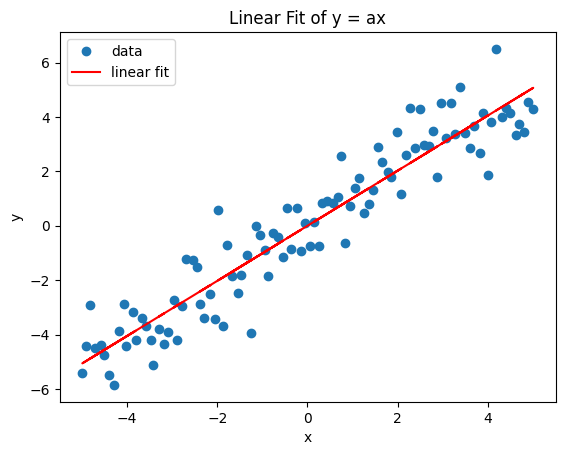

In [4]:
# === 2. Perform a linear regression in the form 𝑦 = 𝑎𝑥 and plot ===

a_x = np.sum(x * y) / np.sum(x**2)  # Slide 109 Linear Regression

plt.figure()
plt.plot(x, y, 'o', label='data')           # Data points
plt.plot(x, a_x*x, 'r-', label='linear fit')  # Fitted line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit of y = ax')
plt.legend()
plt.show()

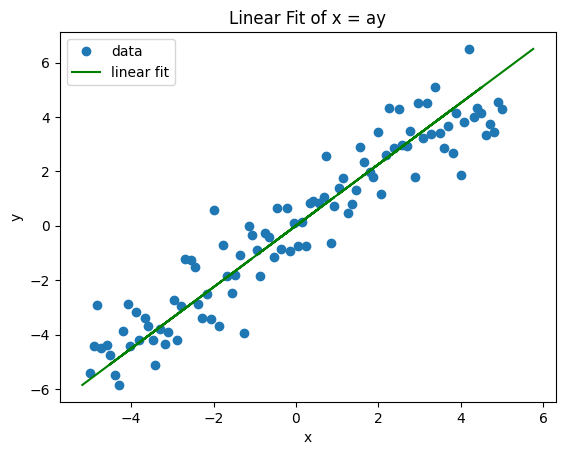

In [5]:
# === 2. Perform a linear regression in the form 𝑥 = 𝑎𝑦 and plot ===

a_y = np.sum(x * y) / np.sum(y**2)  # Slide 109 Linear Regression

plt.figure()
plt.plot(x, y, 'o', label='data')           # Data points
plt.plot(y*a_y, y, 'g-', label='linear fit')  # Fitted line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Fit of x = ay')
plt.legend()
plt.show()

In [6]:
# 3. Perform a PCA on the data ===

# Covariance matrix
covariance = np.dot(X.T, X)  # Dot product of two matrices

# Diagonalize (using the built-in eig function)
eigenvalues, eigenvectors = np.linalg.eig(covariance)

# Report the variances in the two principal directions
var1 = eigenvalues[0]
var2 = eigenvalues[1]
print(f"Variance 𝜎₁²: {var1:.2f}")
print(f"Variance 𝜎₂²: {var2:.2f}")
print(f"Variance 𝜎₁: {np.sqrt(var1):.2f}")
print(f"Variance 𝜎₂: {np.sqrt(var2):.2f}")

# Report the corresponding slopes
V1 = eigenvectors[1]
V2 = eigenvectors[0]
major_axis = V1[0] / V1[1]
minor_axis = V2[0] / V2[1]
print(f"V1 Slope: {major_axis:.2f}")
print(f"V2 Slope: {minor_axis:.2f}")

Variance 𝜎₁²: 47.95
Variance 𝜎₂²: 1778.06
Variance 𝜎₁: 6.92
Variance 𝜎₂: 42.17
V1 Slope: -0.93
V2 Slope: 1.07


In [7]:
# === 4. Perform an SVD ===

U, S, V = np.linalg.svd(X)  # Using the built-in svd function
print('SVD U shape:', np.shape(U))
print('SVD S shape:', np.shape(S))
print('SVD V shape:', np.shape(V))
print(f'Singular values: {S[0]:.2f}, {S[1]:.2f}')

SVD U shape: (100, 100)
SVD S shape: (2,)
SVD V shape: (2, 2)
Singular values: 42.17, 6.92


In [8]:
# === 4. Perform an economy SVD ===

U_econ, S_econ, V_econ = np.linalg.svd(X, full_matrices=False)  # Using the built-in svd function
print('Economy SVD U shape:', np.shape(U_econ))
print('Economy SVD S shape:', np.shape(S_econ))
print('Economy SVD V shape:', np.shape(V_econ))
print(f'Singular values: {S_econ[0]:.2f}, {S_econ[1]:.2f}')

Economy SVD U shape: (100, 2)
Economy SVD S shape: (2,)
Economy SVD V shape: (2, 2)
Singular values: 42.17, 6.92


The economy SVD returns a different sized U matrix. This U matrix has the same number of columns as the number of diagonal values in the S matrix. This is because upon matrix multiplication, all other values in the U matrix will be discarded and do not matter. There are only two singular values, so only the first two columns of the U matrix are utilized.

The singular values are the same as the variances from Q3's PCA. It is important to note that SVD always arranges the singular values from highest to lowest (all being positive). This is why the first singular value is the larger one of the two in this SVD.

In [9]:
# === 5. Perform a truncated SVD ===

# Neglect the second singular value
U_trunc = U_econ[:, :1]
S_trunc = S_econ[:1]
V_trunc = V_econ[:1, :]
X_trunc = S_trunc * np.dot(U_trunc, V_trunc)

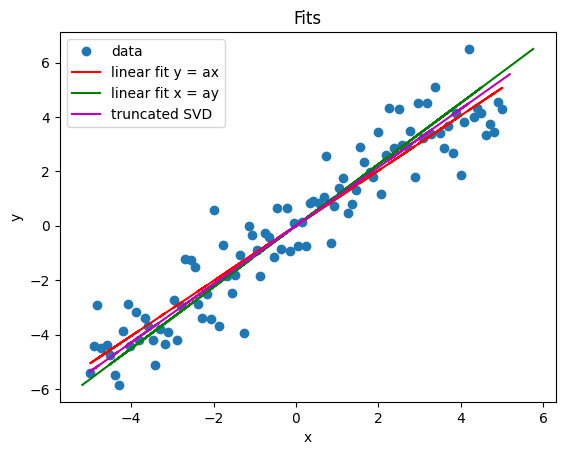

In [10]:
# === 6. Plot the truncated SVD ===

plt.figure()
plt.plot(x, y, 'o', label='data')                        # Data points
plt.plot(x, a_x*x, 'r-', label='linear fit y = ax')      # X Fitted line
plt.plot(a_y*y, y, 'g-', label='linear fit x = ay')      # Y Fitted line
plt.plot(X_trunc[:, 0], X_trunc[:, 1], color='m', label='truncated SVD')  # Truncated SVD
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fits')
plt.legend()
plt.show()

The SVD fit looks like an average between the two y = ax and x = ay fits. It seems to provide a better approximation of the data.